# <span style='color:Blue'> **Customer Churn Prediction for an OTT Platform**  </span>

### ***Classification Problem***

#### Problem Statement
- NETFLIX is a service providing company that provides customers with a one year subscription plan for their product
- The company wants to know if the customers will renew the subscription for the coming year or not

#### Data Dictionary

- It is the data about data

#### About the Dataset

- Year
- Customer_id (Unique)
- Phone_no
- Gender
- Age
- No of days subscribed - the number of days since the subscription
- Multi screen - does the customer have a single/ multiple screen subscription
- Mail subscription - customer receive mails or not9-Weeklv mins watched - number of minutes watched weekly
- Minimum daily mins - minimum minutes watched
- Maximum dailv mins - maximum minutes watched
- Weekly nights max mins - number of minutes watched at night time
- Videos watched - total number of videos watched
- Maximum days inactive - days since inactive
- Customer support calls - number of customer support calls
- Churn 
    - 1- Yes
    - 0- No

#### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [4]:
data = pd.read_csv('OTT Customer Churn data.csv')

In [5]:
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [6]:
data.shape

(2000, 16)

- Observation: We have 2000 rows and 16 columns

#### EDA - Exploratory Data Analysis

- Exploring the data i.e. to know more about data
    - Information about the data
    - Statistical Measure
    - shape
    - duplicate values
    - null values
    - unique values
    - outliers
    - correlation among columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [8]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


#### Duplicate Values

In [9]:
data[data.duplicated()]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


- Observation: There are no duplicate values

#### Null value

In [10]:
data.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

#### Handling the null values
We should try to avoid deleting the missing rows. We fill the null values so that nature of data does not change.
- Numerical Column - replace with mean/median
- Categorical column - replace with mode

In [100]:
# Gender Column Null replace

In [13]:
data.gender.value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [14]:
data.gender.fillna('Female', inplace = True)

In [15]:
data.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [16]:
# maximum_days_inactive - categorical column

data.maximum_days_inactive.value_counts()

3.0    945
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [17]:
data.maximum_days_inactive.mode()

0    3.0
Name: maximum_days_inactive, dtype: float64

In [18]:
data.maximum_days_inactive.fillna(data.maximum_days_inactive.mode()[0], inplace = True)  # 0th index. Latest/highest value of mode

In [19]:
data.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive      0
customer_support_calls     0
churn                     35
dtype: int64

In [20]:
# churn column

data.churn.value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [21]:
data.churn.fillna(1.0, inplace = True) 

# Here, Chrun is float column so we can directly use 1.0; in case it's categorical then we have to pass string '1.0'

In [22]:
data.isna().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

- Remarks: We have successfully treated the null values

#### Outlier Analysis
Outlier - anything very far from the mean. Which does not show the real nature of the data. It is considered as noise for the model. 
- We can Drop the outliers but avoid deleting the rows
- Outliers are checked for numerical column
- Capping method - lower bound, upper bound

How to check the range:

- Z-score method - used for normal distribution
- Quantile method - lower bound (1st Percentile value); Upper bound (99th Percentile value)
- IQR method - (IQR = Q3-Q1) box plot to check outliers (75th Percentile: Q3; 50th Percentile: Median; 25th Percentile: Q1)
     - Upper Bound - Q3 + 1.5 x IQR
     - Lower Bound - Q1 - 1.5 x IQR

In [24]:
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


<AxesSubplot:ylabel='age'>

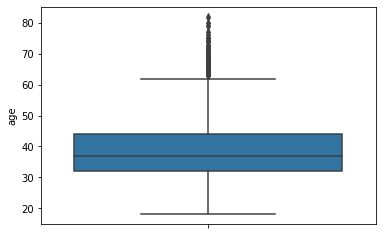

In [25]:
sns.boxplot(y='age', data=data)

- Observation : In the age column we have some outliers 

<AxesSubplot:ylabel='no_of_days_subscribed'>

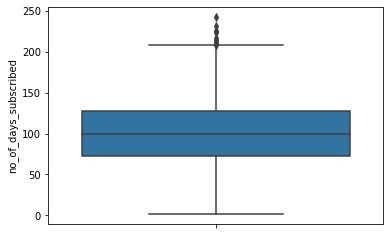

In [26]:
sns.boxplot(y='no_of_days_subscribed', data=data)

- Observation : In the 'no_of_days_subscribed' column we have some outliers 

<AxesSubplot:ylabel='weekly_mins_watched'>

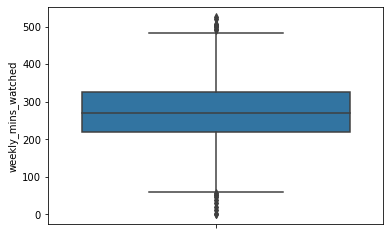

In [27]:
sns.boxplot(y='weekly_mins_watched', data=data)

- Observation : In the 'weekly_mins_watched' column we have some outliers 

<AxesSubplot:ylabel='weekly_max_night_mins'>

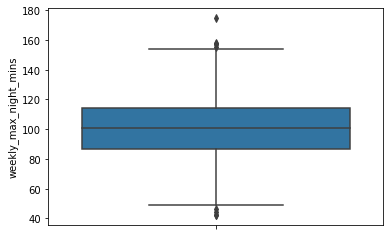

In [28]:
sns.boxplot(y='weekly_max_night_mins', data=data)

- Observation : In the 'weekly_max_night_mins' column we have some outliers 

#### Treating the Outliers
- Here we are using IQR Method to treat the outliers

In [29]:
def out_cap(col):
    q3 = col.quantile(0.75)
    q1 = col.quantile(0.25)
    
    iqr = q3-q1
    
    l_limit = q1-1.5*iqr
    u_limit = q3+1.5*iqr
    
    col = col.clip(lower = l_limit, upper = u_limit)
    return col

In [30]:
data.age.quantile(0.75)

44.0

In [31]:
data.age.quantile(0.25)

32.0

In [32]:
data.age = out_cap(data.age)

<AxesSubplot:ylabel='age'>

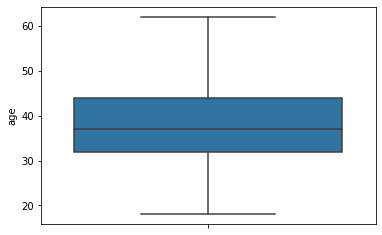

In [33]:
sns.boxplot(y='age', data=data)

In [34]:
data.no_of_days_subscribed = out_cap(data.no_of_days_subscribed)

<AxesSubplot:ylabel='no_of_days_subscribed'>

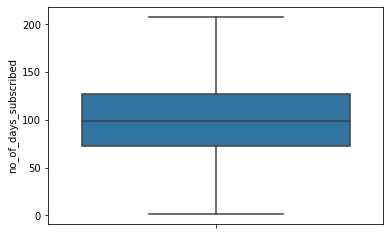

In [35]:
sns.boxplot(y='no_of_days_subscribed', data=data)

In [36]:
data.weekly_mins_watched = out_cap(data.weekly_mins_watched)

<AxesSubplot:ylabel='weekly_mins_watched'>

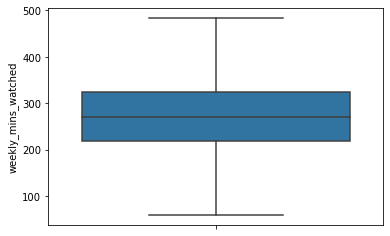

In [37]:
sns.boxplot(y='weekly_mins_watched', data=data)

In [38]:
data.weekly_max_night_mins = out_cap(data.weekly_max_night_mins)

<AxesSubplot:ylabel='weekly_max_night_mins'>

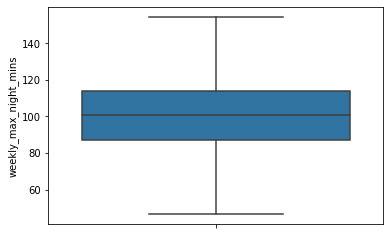

In [39]:
sns.boxplot(y='weekly_max_night_mins', data=data)

- Remarks : We have successfully treated the Outliers

#### Data Transformation
- Transform the object/string column to numeric values
- Discard/drop the unnecessary columns

In [40]:
data.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                       float64
no_of_days_subscribed     float64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins     float64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

#### Spiliting the dataset into Numeric and Object Column

In [42]:
num_data = data.select_dtypes('number')

In [43]:
num_data.head()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,36.0,62.0,148.35,12.2,16.81,82.0,1,4.0,1,0.0
1,2015,100643,39.0,149.0,294.45,7.7,33.37,87.0,3,3.0,2,0.0
2,2015,100756,62.0,126.0,87.30,11.9,9.89,91.0,1,4.0,5,1.0
3,2015,101595,24.0,131.0,321.30,9.5,36.41,102.0,4,3.0,3,0.0
4,2015,101653,40.0,191.0,243.00,10.9,27.54,83.0,7,3.0,1,0.0


In [44]:
obj_data = data.select_dtypes('object')

In [45]:
obj_data.head()

,phone_no,gender,multi_screen,mail_subscribed
0,409-8743,Female,no,no
1,340-5930,Female,no,no
2,372-3750,Female,no,no
3,331-4902,Female,no,yes
4,351-8398,Female,no,no


In [46]:
# Dropping the Column phone_no beacuse it is useless for our data model

In [47]:
obj_data.drop('phone_no', axis=1, inplace = True)

In [48]:
obj_data.head()

,gender,multi_screen,mail_subscribed
0,Female,no,no
1,Female,no,no
2,Female,no,no
3,Female,no,yes
4,Female,no,no


In [49]:
# Gender Column

obj_data.gender.value_counts()

Male      1053
Female     947
Name: gender, dtype: int64

#### Label encoding 

- level in data - categorical column (1,2,3,...)
- No level in data - one-hot coding(1,0)

In [52]:
# As gender column does not have any hierarchy (or levels), we can use one-hot coding

In [53]:
gender_data = pd.get_dummies(obj_data.gender)  # syntax to pass one hot coding

In [54]:
gender_data

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,1,0
1998,0,1


In [55]:
# Concatinating gender_data with the obj_data

obj_data = pd.concat([obj_data, gender_data], axis = 1)

In [56]:
obj_data.head()

,gender,multi_screen,mail_subscribed,Female,Male
0,Female,no,no,1,0
1,Female,no,no,1,0
2,Female,no,no,1,0
3,Female,no,yes,1,0
4,Female,no,no,1,0


In [57]:
# multi_screen column

obj_data.multi_screen.value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

In [58]:
# We can replace 'no' with 0 and 'yes' with 1 for analysis

obj_data.replace({'no':0,'yes':1}, inplace = True)

In [59]:
obj_data.head()

,gender,multi_screen,mail_subscribed,Female,Male
0,Female,0,0,1,0
1,Female,0,0,1,0
2,Female,0,0,1,0
3,Female,0,1,1,0
4,Female,0,0,1,0


- Remarks : We have successfully dealt with data transformation

#### Drop the Unnecessary columns

In [60]:
obj_data.drop('gender', axis =1, inplace = True)

In [61]:
obj_data.head()

,multi_screen,mail_subscribed,Female,Male
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,1,0
4,0,0,1,0


In [62]:
# All the columns are numeric col now

obj_data.dtypes

multi_screen       int64
mail_subscribed    int64
Female             uint8
Male               uint8
dtype: object

In [63]:
num_data.dtypes

year                        int64
customer_id                 int64
age                       float64
no_of_days_subscribed     float64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins     float64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [ ]:
# We can concatenate num_data and obj_data to create Features

In [64]:
features = pd.concat([num_data, obj_data], axis = 1)

In [65]:
features.head()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,multi_screen,mail_subscribed,Female,Male
0,2015,100198,36.0,62.0,148.35,12.2,16.81,82.0,1,4.0,1,0.0,0,0,1,0
1,2015,100643,39.0,149.0,294.45,7.7,33.37,87.0,3,3.0,2,0.0,0,0,1,0
2,2015,100756,62.0,126.0,87.30,11.9,9.89,91.0,1,4.0,5,1.0,0,0,1,0
3,2015,101595,24.0,131.0,321.30,9.5,36.41,102.0,4,3.0,3,0.0,0,1,1,0
4,2015,101653,40.0,191.0,243.00,10.9,27.54,83.0,7,3.0,1,0.0,0,0,1,0


In [66]:
# Drop Year and customer_id as they are useless for the model

features.drop(['year', 'customer_id'], axis = 1, inplace = True)

In [67]:
features.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,multi_screen,mail_subscribed,Female,Male
0,36.0,62.0,148.35,12.2,16.81,82.0,1,4.0,1,0.0,0,0,1,0
1,39.0,149.0,294.45,7.7,33.37,87.0,3,3.0,2,0.0,0,0,1,0
2,62.0,126.0,87.30,11.9,9.89,91.0,1,4.0,5,1.0,0,0,1,0
3,24.0,131.0,321.30,9.5,36.41,102.0,4,3.0,3,0.0,0,1,1,0
4,40.0,191.0,243.00,10.9,27.54,83.0,7,3.0,1,0.0,0,0,1,0


In [68]:
features.shape

(2000, 14)

#### Divide this dataset into Features and Target

In [69]:
X = features.drop('churn', axis = 1)   # Drop the churn column as it is Target

In [70]:
X.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,multi_screen,mail_subscribed,Female,Male
0,36.0,62.0,148.35,12.2,16.81,82.0,1,4.0,1,0,0,1,0
1,39.0,149.0,294.45,7.7,33.37,87.0,3,3.0,2,0,0,1,0
2,62.0,126.0,87.30,11.9,9.89,91.0,1,4.0,5,0,0,1,0
3,24.0,131.0,321.30,9.5,36.41,102.0,4,3.0,3,0,1,1,0
4,40.0,191.0,243.00,10.9,27.54,83.0,7,3.0,1,0,0,1,0


In [71]:
y = features.churn

In [72]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [101]:
# Training data (Features and Target)
# Test data (Features - we pass this features to the model and get prediction)

# We will split the data into Training and Test
# - 80% Training data
# - 20% Test data

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  # splitting into 80-20 ratio

In [76]:
X_train

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,multi_screen,mail_subscribed,Female,Male
1811,29.0,119.0,325.80,11.3,36.92,85.0,4,4.0,0,0,1,1,0
580,34.0,168.0,193.20,11.2,21.90,128.0,2,4.0,1,0,0,0,1
185,40.0,72.0,139.20,5.8,15.78,83.0,7,2.0,1,0,1,0,1
140,36.0,92.0,396.45,9.3,44.93,73.0,5,3.0,0,1,0,0,1
1841,42.0,135.0,302.70,10.3,34.31,82.0,6,3.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,35.0,97.0,181.20,11.9,20.54,63.0,3,4.0,4,0,0,1,0
344,30.0,141.0,323.10,7.8,36.62,89.0,6,3.0,1,0,1,1,0
1917,50.0,64.0,329.40,9.7,37.33,65.0,5,3.0,1,0,0,1,0
1636,36.0,127.0,353.40,7.7,40.05,127.0,2,3.0,1,0,1,1,0


In [77]:
y_train

1811    0.0
580     0.0
185     0.0
140     0.0
1841    0.0
       ... 
1873    1.0
344     0.0
1917    0.0
1636    0.0
780     0.0
Name: churn, Length: 1600, dtype: float64

In [78]:
X_test

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,multi_screen,mail_subscribed,Female,Male
379,29.0,182.0,157.35,8.0,17.83,91.0,5,3.0,2,0,0,1,0
899,30.0,96.0,296.55,10.5,33.61,67.0,3,3.0,3,0,0,0,1
881,35.0,79.0,155.55,14.8,17.63,102.0,4,4.0,2,0,1,1,0
1346,21.0,33.0,280.20,15.0,31.76,103.0,5,5.0,0,0,1,0,1
441,34.0,115.0,374.85,15.3,42.48,121.0,6,5.0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,53.0,118.0,401.70,14.4,45.53,91.0,11,4.0,5,0,0,0,1
1296,52.0,85.0,248.70,10.9,28.19,116.0,3,3.0,5,0,0,0,1
693,33.0,113.0,236.70,8.7,26.83,100.0,2,3.0,5,0,1,0,1
198,36.0,113.0,91.80,13.7,10.40,114.0,3,4.0,5,0,0,1,0


In [79]:
y_test

379     0.0
899     0.0
881     0.0
1346    0.0
441     1.0
       ... 
607     1.0
1296    1.0
693     1.0
198     1.0
1586    0.0
Name: churn, Length: 400, dtype: float64

In [80]:
# Data Model

# Train features(X_train)
# Train target(y_train)

### ***Data Modelling***

In [81]:
# Logistic Regression
# Decision Tree

#### **Logistic Regression**

- Importing the Model

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log_reg = LogisticRegression()

- Fitting the Model

In [84]:
log_reg.fit(X_train, y_train)

LogisticRegression()

- Prediction from Model

In [85]:
# on the test data we'll get the prediction

In [86]:
log_reg.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

- Check the Accuracy 

In [87]:
# matching the prediction with y_test to check the efficiency of model

In [88]:
log_reg.score(X_test, y_test)

0.8375

In [102]:
# Remarks: We got 85% accuracy after training the logistic regression model

#### **Decision Tree**

- Importing the Decision Tree model

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dec_tree = DecisionTreeClassifier()

- Fitting the model

In [93]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

- Prediction from Model

In [94]:
dec_tree.predict(X_test)

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1.

- Accuracy Check

In [95]:
dec_tree.score(X_test, y_test)

0.8125

In [97]:
# Remarks: We got 83% Accuracy after training the Decision Tree model

#### Conclusion: For this Study, Logistic Regression Model is better.

#### -------------- END ------------- ####